In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Importing the Dataset
dataset = pd.read_csv('norway_new_car_sales_by_month.csv')
dataset.head()

,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,Diesel_Co2,Quantity_Diesel,Diesel_Share,Diesel_Share_LY,Quantity_Hybrid,Quantity_Electric,Import_Electric,Purchased
0,2007,1,12685,5227,2276,257,NaN,NaN,152,155,152,10072,79.4,52.5,NaN,NaN,NaN,0
1,2007,2,9793,2448,1992,-89,NaN,NaN,156,159,155,7222,73.7,47.4,NaN,NaN,NaN,0
2,2007,3,11264,1445,2626,45,NaN,NaN,159,161,158,7965,70.7,48.1,NaN,NaN,NaN,0
3,2007,4,8854,504,2220,-130,NaN,NaN,160,165,158,6116,69.1,48.4,NaN,NaN,NaN,0
4,2007,5,12007,1592,2881,7,NaN,NaN,160,163,159,8519,71.0,49.1,NaN,NaN,NaN,0


In [5]:
x = []
for i in range(len(dataset)):
    x.append(i)
sell_y = dataset.iloc[:,2]

In [6]:
# Feature Scaling
month = np.reshape(x, (-1, 1))
sells = np.reshape(sell_y,(-1, 1))

/srv/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


In [7]:
#Handling Missing Data
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(sells)
sell = imputer.transform(sells)

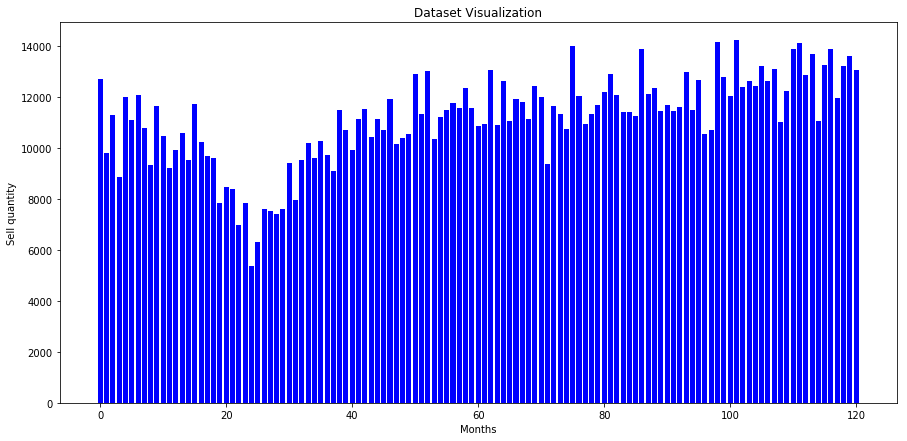

In [8]:
# Dataset Visualization
from matplotlib.ticker import FuncFormatter
from matplotlib.pyplot import figure
plt.figure(figsize=(15,7))
plt.bar(x, sell_y,color ='blue')
plt.title('Dataset Visualization')
plt.xlabel('Months')
plt.ylabel('Sell quantity')
plt.savefig('Dataset Visualization')
plt.show()

In [9]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
month_train, month_test, sell_train, sell_test = train_test_split(month, sell, test_size = 1/3, random_state = 0)

/srv/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Linear regression

In [10]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(month_train, sell_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
# Predicting the Test set results
lin_sell_pred = linear_regressor.predict(month_test)

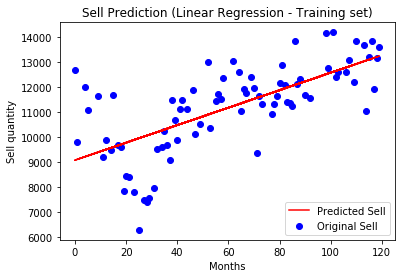

In [12]:
# Visualising the Training set results
plt.scatter(month_train, sell_train, color = 'blue', label='Original Sell')
plt.plot(month_train, linear_regressor.predict(month_train), color = 'red', label='Predicted Sell')
plt.title('Sell Prediction (Linear Regression - Training set)')
plt.xlabel('Months')
plt.ylabel('Sell quantity')
plt.legend(loc='lower right')
plt.savefig('Linear Regression - Training set')
plt.show()

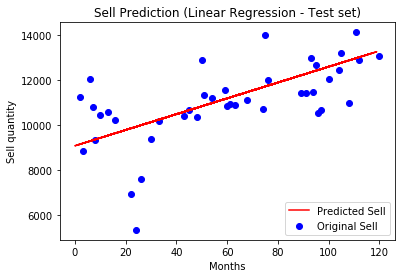

In [13]:
# Visualising the Test set results
plt.scatter(month_test, sell_test, color = 'blue', label='Original Sell')
plt.plot(month_train, linear_regressor.predict(month_train), color = 'red', label='Predicted Sell')
plt.title('Sell Prediction (Linear Regression - Test set)')
plt.xlabel('Months')
plt.ylabel('Sell quantity')
plt.legend(loc='lower right')
plt.savefig('Linear Regression - Test set')
plt.show()

In [14]:
# The coefficient of determination R^2 of the prediction.
linear_accuracy = linear_regressor.score(month, sell, sample_weight=None)
print("Linear Regression Accuracy: %.3f%%" % (linear_accuracy*100.0))

Linear Regression Accuracy: 42.924%


In [15]:
# Predict the sales based on user input month
linear_sell_pred = linear_regressor.predict(month_train)
print('\033[1;35;47m Test months are: \033[0m', *month_test)
mi = input('\n\033[1;37;40m Enter number of month: \033[0m')
m = int(mi)
for i in range(0,len(month_test)):
    if(month_test[i] == m):
        print('\n\033[1;31;47m Predicted Sell quantity: \033[0m', linear_sell_pred[i])
        break;
print('\n\033[1;34;47m Original Sell quantity: \033[0m', sell[m])

 Test months are:  [48] [94] [95] [8] [97] [22] [7] [10] [45] [89] [33] [50] [2] [60] [120] [74] [30] [43] [112] [76] [63] [59] [16] [24] [111] [13] [54] [93] [26] [68] [51] [104] [108] [61] [3] [96] [6] [75] [100] [91] [105]



 Enter number of month:  10



 Predicted Sell quantity:  [ 11254.7237266]

 Original Sell quantity:  [ 10453.]


# Polynomial Regression

Best degree 4 with RMSE 1192.963326760103


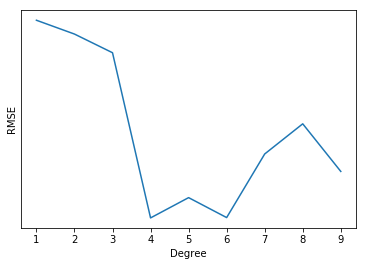

In [16]:
# Importing the libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

rmses = []
#Taking the range of degrees
degrees = np.arange(1, 10)
min_rmse, min_deg = 1e10, 0

for deg in degrees:

    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    month_poly_train = poly_features.fit_transform(month_train)

    poly_reg = LinearRegression()
    poly_reg.fit(month_poly_train, sell_train)

    month_poly_test = poly_features.fit_transform(month_test)
    poly_predict = poly_reg.predict(month_poly_test)
    poly_mse = mean_squared_error(sell_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)

    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

print('Best degree {} with RMSE {}'.format(min_deg, min_rmse))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')
plt.show()

In [17]:
# Fitting Polynomial Regression to the dataset
poly_regressor = PolynomialFeatures(degree = 4)
month_poly = poly_regressor.fit_transform(month)
poly_regressor.fit(month_poly, sell)
linear_regressor_2 = LinearRegression()
linear_regressor_2.fit(month_poly, sell)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

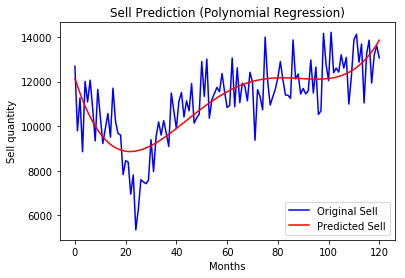

In [18]:
# Visualising the Polynomial Regression results
plt.plot(month, sell, color = 'blue', label='Original Sell')
plt.plot(month, linear_regressor_2.predict(poly_regressor.fit_transform(month)), color = 'red', label='Predicted Sell')
plt.title('Sell Prediction (Polynomial Regression)')
plt.xlabel('Months')
plt.ylabel('Sell quantity')
plt.legend(loc='lower right')
plt.savefig('Polynomial Regression')
plt.show()

In [19]:
# The coefficient of determination R^2 of the prediction.
from sklearn.metrics import r2_score
sell_pred_poly = linear_regressor_2.predict(poly_regressor.fit_transform(month))
poly_accuracy = r2_score(sell, sell_pred_poly)
print("Polynomial Regression Accuracy: %.3f%%" % (poly_accuracy*100.0))

Polynomial Regression Accuracy: 60.108%


#  Support Vector Regression

In [20]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_month = StandardScaler()
month_train = sc_month.fit_transform(month_train)
month_test = sc_month.transform(month_test)
sc_sell = StandardScaler()
sell_train = np.reshape(sell_train, (-1, 1))
sell_train = sc_sell.fit_transform(sell_train)

/srv/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [21]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
svr_regressor = SVR(kernel = 'rbf')
svr_regressor.fit(month,sell)

/srv/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [22]:
# Predicting a new result
svr_sell_pred = svr_regressor.predict(6.5)
svr_sell_pred = sc_sell.inverse_transform(svr_sell_pred)

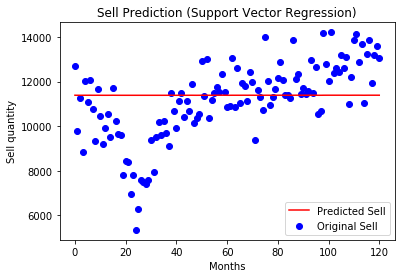

In [23]:
# Visualising the SVR results
plt.scatter(month, sell, color = 'blue', label='Original Sell')
plt.plot(month, svr_regressor.predict(month), color = 'red', label='Predicted Sell')
plt.title('Sell Prediction (Support Vector Regression)')
plt.xlabel('Months')
plt.ylabel('Sell quantity')
plt.legend(loc='lower right')
plt.savefig('Support Vector Regression')
plt.show()

In [24]:
# The coefficient of determination R^2 of the prediction.
svr_accuracy = svr_regressor.score(month, sell)
print("Support Vector Regression Accuracy: %.3f%%" % (svr_accuracy*100.0))

Support Vector Regression Accuracy: -1.940%


# Decision tree regression

In [25]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(max_depth = 5, random_state = 1)
dt_regressor.fit(month, sell)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=1,
           splitter='best')

In [26]:
# Predicting a new result
dt_sell_pred = dt_regressor.predict(month)

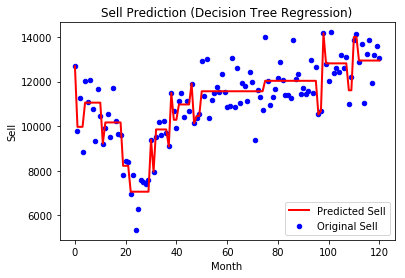

In [27]:
# Visualising the Decision Tree Regression results
plt.scatter(month, sell, s=20, color = 'blue', label='Original Sell')
plt.plot(month, dt_sell_pred, color = 'red', label='Predicted Sell', linewidth=2)
plt.title('Sell Prediction (Decision Tree Regression)')
plt.xlabel('Month')
plt.ylabel('Sell')
plt.legend(loc='lower right')
plt.savefig('Decision Tree Regression')
plt.show()

In [28]:
# The coefficient of determination R^2 of the prediction.
dt_accuracy = dt_regressor.score(month, sell)
print("Decision Tree Regression Accuracy: %.3f%%" % (dt_accuracy*100.0))

Decision Tree Regression Accuracy: 83.336%


# Random Forest Regression

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf_regressor.fit(month, sell)

C:\Users\MAK\Anaconda3\envs\workshop\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [28]:
rf_sell_pred = rf_regressor.predict(6.5)

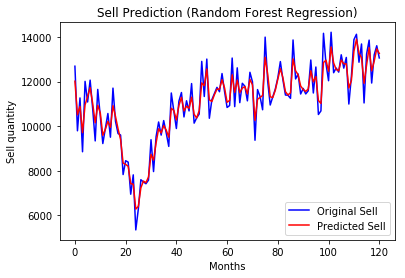

In [29]:
#plt.scatter(month, sell, color = 'blue',label='Original Sell')
plt.plot(month, sell, color = 'blue', label = 'Original Sell')
plt.plot(month, rf_regressor.predict(month), color = 'red', label = 'Predicted Sell')
plt.title('Sell Prediction (Random Forest Regression)')
plt.xlabel('Months')
plt.ylabel('Sell quantity')
plt.legend(loc = 'lower right')
plt.savefig('Random Forest Regression')
plt.show()

In [30]:
rf_accuracy = rf_regressor.score(month, sell)
print("Random Forest Regression Accuracy: %.3f%%" % (rf_accuracy*100.0))

Random Forest Regression Accuracy: 93.376%


In [31]:
sell_pred_rf = rf_regressor.predict(month)
mi = input('\n\033[1;37;40m Enter number of month: \033[0m')
m = int(mi) + 2
print('\n\033[1;31;47m Predicted Sell quantity: \033[0m', sell_pred_rf[m])
print('\n\033[1;34;47m Original Sell quantity: \033[0m', sell[m])


 Enter number of month: 48

 Predicted Sell quantity:  11935.64

 Original Sell quantity:  [ 12901.]


## THE END